<a href="https://colab.research.google.com/github/yadgire7/AUDIO-PROCESSING-ML/blob/master/RMSE_AND_ZCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RMSE = Root Mean Squred Error

ZCR = Zero Crossing Rate.
It is the number of times a signal crosses the horizontal axis


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd

In [2]:
folder_path = "/content/drive/MyDrive/SAIL/sample_audio/"
piano_file = "piano.mp3"
drum_file = "drum.mp3"

In [4]:
# load files
piano, p_sr = librosa.load(os.path.join(folder_path, piano_file))
drum, d_sr= librosa.load(os.path.join(folder_path, drum_file))

In [10]:
piano

array([ 3.3013523e-05, -1.0190159e-04, -3.3088028e-05, ...,
        5.1850565e-03,  2.2315630e-04, -2.8103613e-04], dtype=float32)

In [5]:
piano_player = ipd.Audio(os.path.join(folder_path, piano_file))
piano_player

In [14]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

rms_piano = librosa.feature.rms(y = piano, frame_length= FRAME_SIZE, hop_length= HOP_LENGTH)[0]
rms_drum = librosa.feature.rms(y = drum, frame_length= FRAME_SIZE, hop_length= HOP_LENGTH)[0]

In [15]:
rms_piano.shape

(603,)

(-1.0, 1.0)

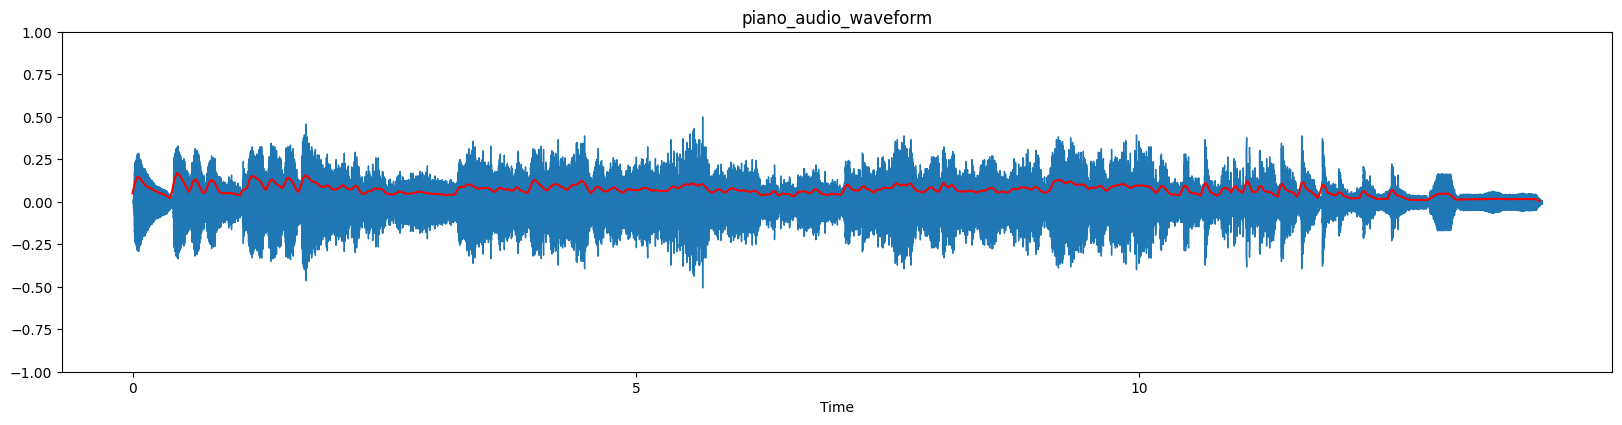

In [16]:
frames = range(len(rms_piano))
t = librosa.frames_to_time(frames, hop_length= HOP_LENGTH)

plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
librosa.display.waveshow(piano)
plt.plot(t, rms_piano, color = "r")
plt.title("piano_audio_waveform")
plt.ylim((-1,1))

(-1.0, 1.0)

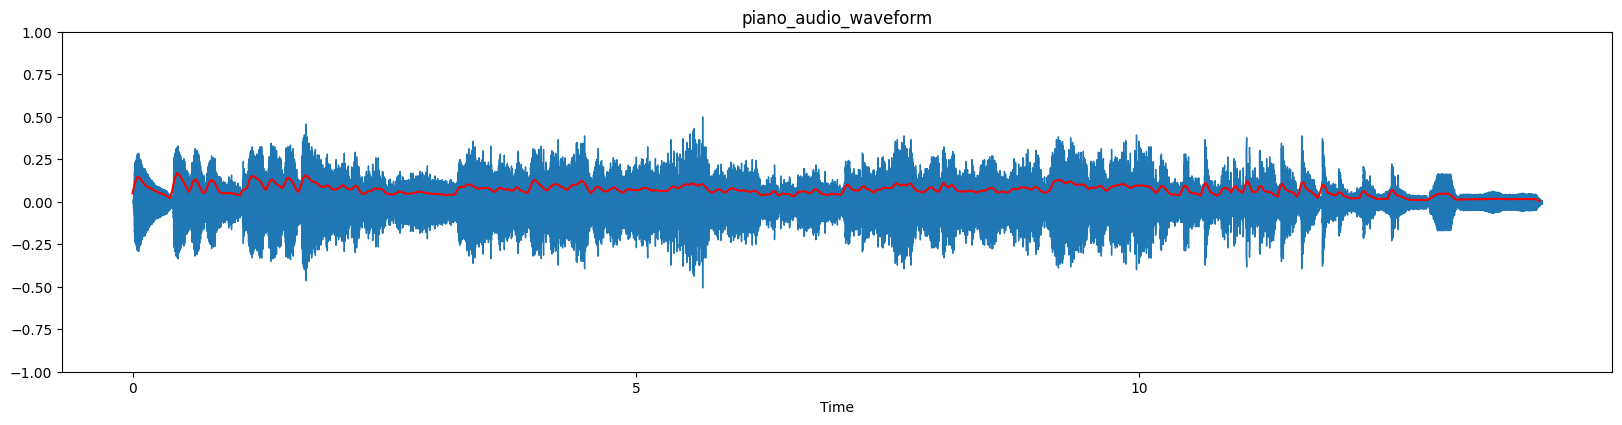

In [21]:
frames = range(len(rms_piano))
t = librosa.frames_to_time(frames, hop_length= HOP_LENGTH)

plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
librosa.display.waveshow(piano)
plt.plot(t, rms_piano, color = "r")
plt.title("piano_audio_waveform")
plt.ylim((-1,1))

(-1.0, 1.0)

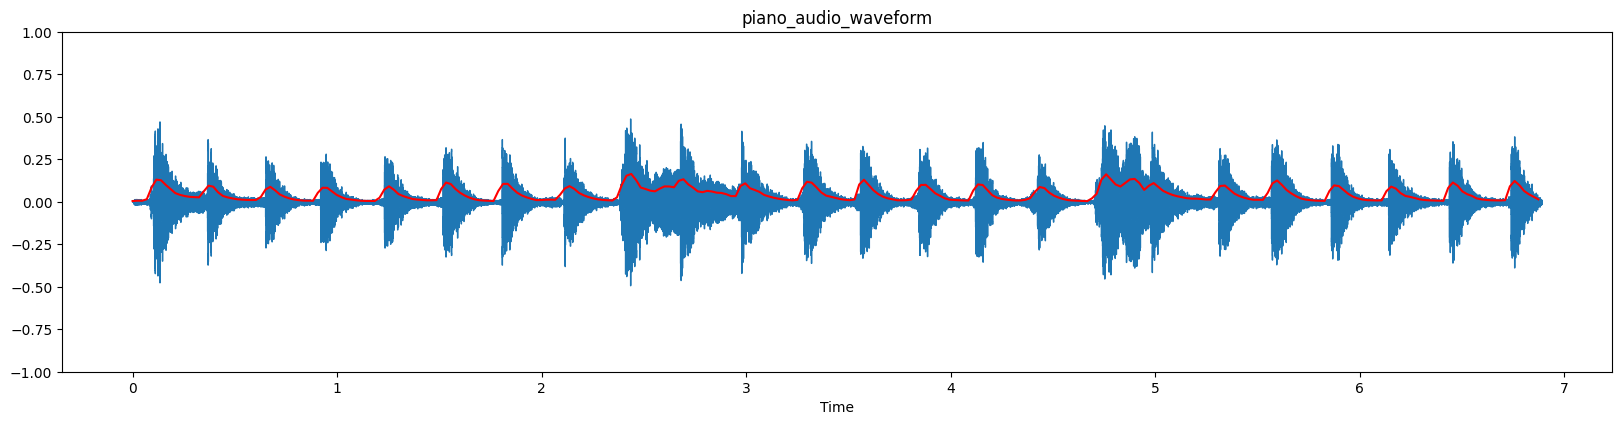

In [20]:
frames = range(len(rms_drum))
t = librosa.frames_to_time(frames, hop_length= HOP_LENGTH)

plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
librosa.display.waveshow(drum)
plt.plot(t, rms_drum, color = "r")
plt.title("piano_audio_waveform")
plt.ylim((-1,1))

In [22]:
def cal_rmse(signal, frame_size, hop_size):
    rmse = []
    for i in range(0, len(signal), hop_size):
        cur_rmse = np.sqrt((np.sum(signal[i:i+frame_size])**2) / frame_size)
        rmse.append(cur_rmse)
    return np.array(rmse)


In [31]:
rmse_piano = cal_rmse(piano, frame_size=FRAME_SIZE, hop_size=HOP_LENGTH)
rmse_drum = cal_rmse(drum, frame_size=FRAME_SIZE, hop_size=HOP_LENGTH)

(-1.0, 1.0)

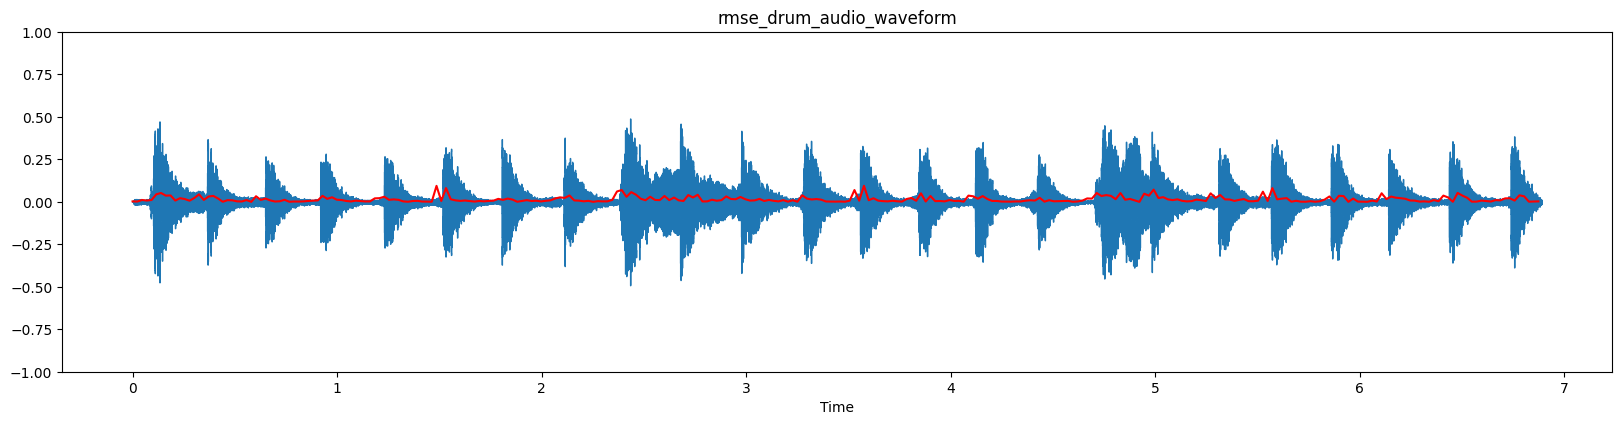

In [32]:
frames = range(len(rmse_drum))
t = librosa.frames_to_time(frames, hop_length= HOP_LENGTH)
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
librosa.display.waveshow(drum)
plt.plot(t, rmse_drum, color = "r")
plt.title("rmse_drum_audio_waveform")
plt.ylim((-1,1))

(-1.0, 1.0)

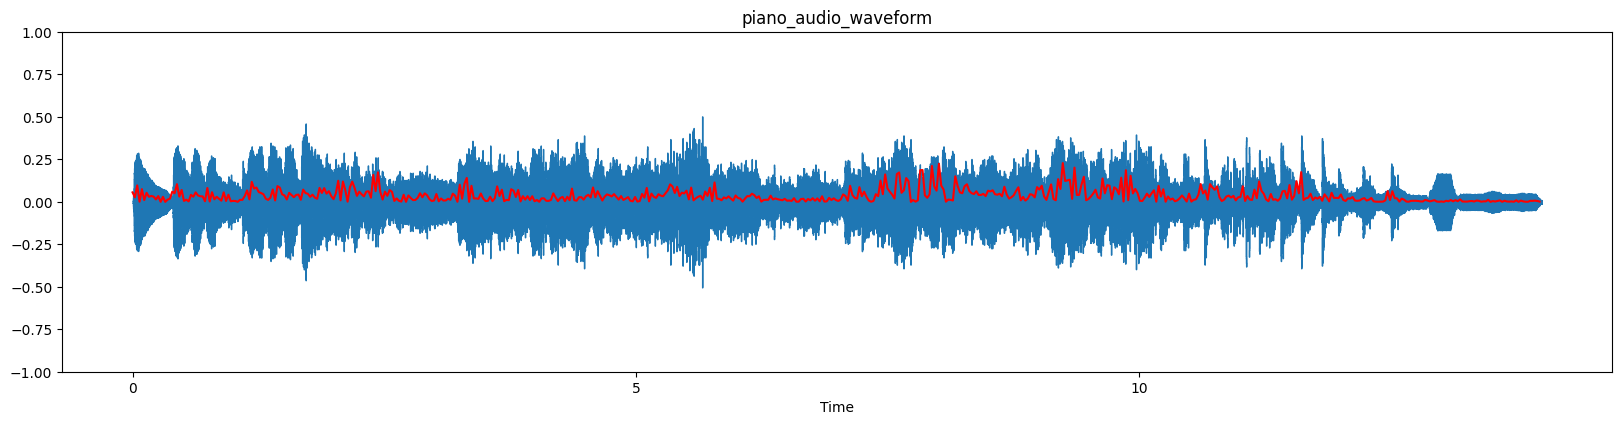

In [33]:
frames = range(len(rmse_piano))
t = librosa.frames_to_time(frames, hop_length= HOP_LENGTH)
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
librosa.display.waveshow(piano)
plt.plot(t, rmse_piano, color = "r")
plt.title("piano_audio_waveform")
plt.ylim((-1,1))

In [26]:
# zero crossing rate
zcr_piano = librosa.feature.zero_crossing_rate(y = piano, frame_length= FRAME_SIZE, hop_length= HOP_LENGTH)[0]
zcr_drum = librosa.feature.zero_crossing_rate(y = drum, frame_length= FRAME_SIZE, hop_length= HOP_LENGTH)[0]

(-1.0, 1.0)

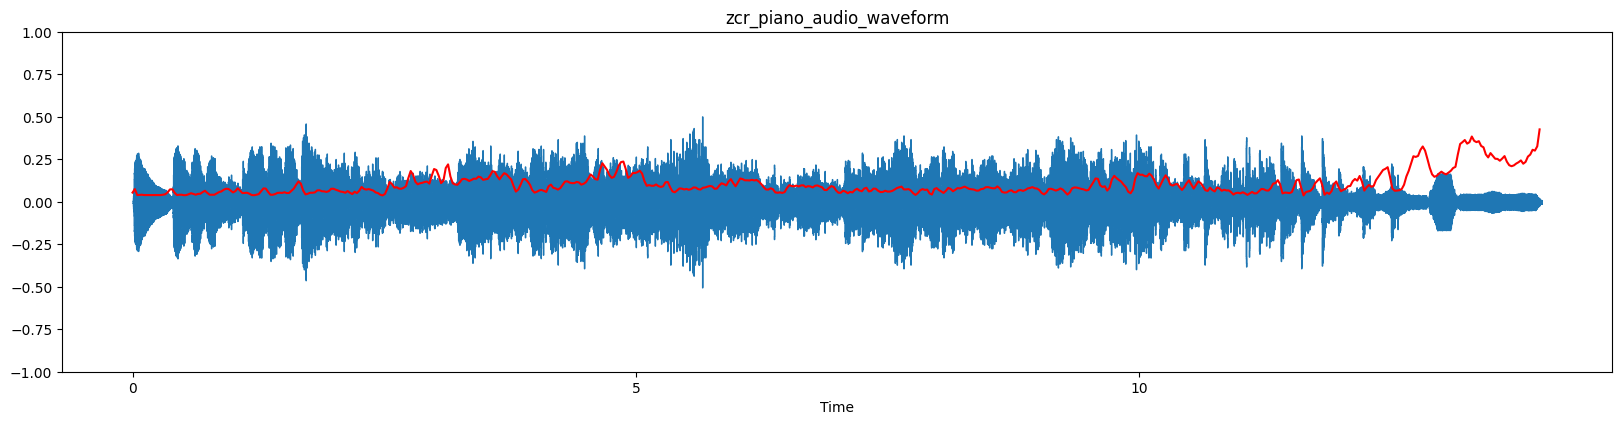

In [34]:
# visualizing zcr for audio signals
frames = range(len(zcr_piano))
t = librosa.frames_to_time(frames, hop_length= HOP_LENGTH)
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
librosa.display.waveshow(piano)
plt.plot(t, zcr_piano, color = "r")
plt.title("zcr_piano_audio_waveform")
plt.ylim((-1,1))

(-1.0, 1.0)

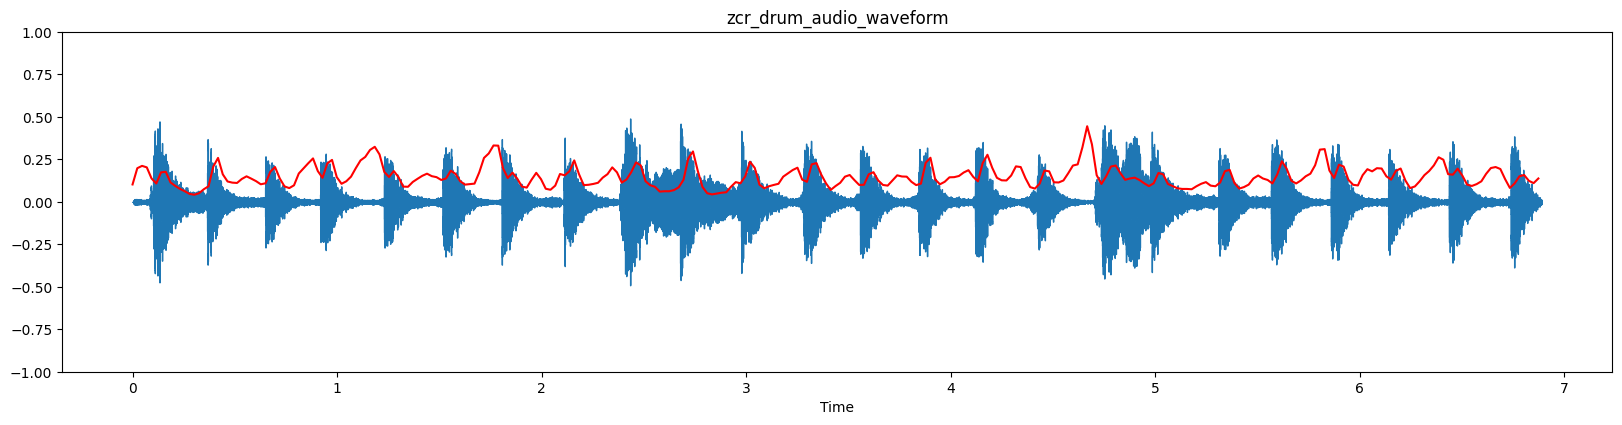

In [35]:
frames = range(len(zcr_drum))
t = librosa.frames_to_time(frames, hop_length= HOP_LENGTH)
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
librosa.display.waveshow(drum)
plt.plot(t, zcr_drum, color = "r")
plt.title("zcr_drum_audio_waveform")
plt.ylim((-1,1))